#### Sustainable Development Goals (SDGs) covered by CS projects

CS projects were classified into 17 SDGs using ESA

In [ ]:
# pandas and numpy for reading and manipulating the data
import pandas as pd
import numpy as np

# matplotlib and seaborn for visualizing the data
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# read the dataset
dbRecords = pd.read_csv('query_result.csv')

In [ ]:
# basic stats about the data
#dbRecords.info()

#### Q1. What is the distribution of SDGs at the project level? (considering the 17 SDGs)

In [ ]:
#projects without SDG assignments
dbRecords['Sdg'].isnull().sum()

100

In [ ]:
#filter project title and SDG for analysis
dfn = dbRecords[['Title', 'Sdg']]
df1 = dfn.dropna()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4849 entries, 0 to 4948
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   4849 non-null   object
 1   Sdg     4849 non-null   object
dtypes: object(2)
memory usage: 113.6+ KB


In [ ]:
df1 = df1[df1.Sdg != '[]']

In [ ]:
#example - ESA Assignment
pd.options.display.max_colwidth = 100
#df1.head()

In [ ]:
# only report the highest similarity SDG assignment
newlist = []

for a in df1['Sdg']:
  sdg = a.split(",")[1] 
  newlist.append(sdg) 

In [ ]:
df1['Extracted SDGs'] = np.array(newlist) 
df1.head()

,Title,Sdg,Extracted SDGs
2,Citree,"[""SDG, SDG #11, 0.37277650533619905"" ""SDG, SDG #10, 0.2875334888728189"" ""SDG, SDG #9, 0.28366352...",SDG #11
3,Fossilfinder,"[""SDG, SDG #1, 0.2798758512519837"" ""SDG, SDG #11, 0.2577752435516754""]",SDG #1
4,Roadkill,"[""SDG, SDG #15, 0.26473126252405066""]",SDG #15
5,KraMobil,"[""SDG, SDG #15, 0.31988754640008393"" ""SDG, SDG #2, 0.2802445714754503""]",SDG #15
7,Heavy Metal City-Zen,"[""SDG, SDG #11, 0.29815217853355935"" ""SDG, SDG #2, 0.2582125142003165""]",SDG #11


In [ ]:
# distribution of SDGs across 4849 projects
df1['Extracted SDGs'].value_counts()

 SDG #15    1052
 SDG #4      341
 SDG #1      299
 SDG #3      240
 SDG #11     198
 SDG #6      188
 SDG #14     118
 SDG #13      99
 SDG #2       53
 SDG #10      46
 SDG #12      40
 SDG #7       34
 SDG #9       16
 SDG #5       16
 SDG #8       16
 SDG #16       5
 SDG #17       5
Name: Extracted SDGs, dtype: int64

In [ ]:
df1.rename(columns = {'Extracted SDGs':'Extracted_SDGs'}, inplace = True)

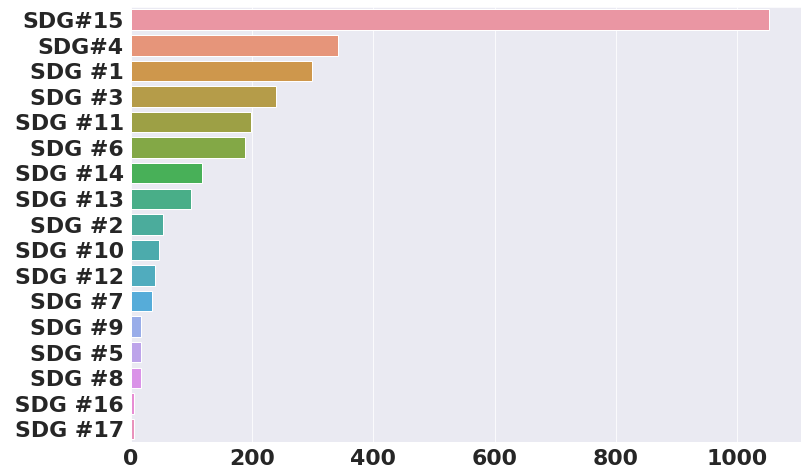

In [ ]:
plt.rcParams["figure.figsize"] = [12, 8]
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

sns.set_style('darkgrid')

x = ['SDG#15', 'SDG#4', 'SDG #1', 'SDG #3', 'SDG #11', 'SDG #6', 'SDG #14', 'SDG #13', 'SDG #2', 'SDG #10', 'SDG #12', 'SDG #7', 'SDG #9', 'SDG #5', 'SDG #8', ' SDG #16', 'SDG #17']
y = [1052, 341, 299, 240, 198, 188, 118, 99, 53,  46,  40, 34, 16, 16, 16, 5, 5  ]

sns.color_palette("cubehelix", as_cmap=True)
save_plot = sns.barplot(y, x)
fig = save_plot.get_figure()
fig.savefig("sdg-count.png") 



#### Q2: What is the distribution of SDGs at the platform level?

In [ ]:
#add platform details
merged_data = df1.merge(dbRecords, left_on='Title', right_on='Title', suffixes=('_left', '_right'))

#data relevant for analysis
platofrm_analysis = merged_data[['Wp2 ID', 'Title', 'Sdg_left', 'Extracted_SDGs']]
#platofrm_analysis.head() 

In [ ]:
platofrm_analysis.rename(columns={'Wp2 ID': 'PlatformID'}, inplace = True)
platofrm_analysis.to_csv('platofrm_analysis.csv') 

In [ ]:
#NOTE: # platofrm_analysis.csv has been manually preprocessed by checking multiple Platfrom ID assignments to a single CS prokect
#load processed data
platform_percentages = pd.read_csv('platofrm_analysis_SDG.csv')
#platform_percentages.head()

In [ ]:
platform_percentages_count = platform_percentages.groupby(['PlatformID','Extracted_SDGs'])['Extracted_SDGs'].count()
#platform_percentages_count.to_csv('platform_percentages_SDG_count.csv')

Selected list of Platforms: Platform ID, Name

+ 13 - Zooniverse
+ 17 - EU citizen science
+ 1- Citizen Science Vlaanderen
+ 6 - Ciencia Ciudadana España
+ 10 - Schweiz forscht


In [ ]:
# SDG assignment zooniverse 
zooniverse = platform_percentages[platform_percentages['PlatformID'] == 13] 
zooniverse['Extracted_SDGs'].value_counts()

SDG #15    106
SDG #1      27
SDG #13     16
SDG #7      12
SDG #3      10
SDG #4       9
SDG #14      8
SDG #11      7
SDG #5       2
SDG #6       2
SDG #2       2
SDG #10      2
SDG #16      1
SDG #8       1
Name: Extracted_SDGs, dtype: int64

In [ ]:
# SDG assignment EU citizen science 
EU = platform_percentages[platform_percentages['PlatformID'] == 17] 
EU['Extracted_SDGs'].value_counts()

SDG #15    29
SDG #4     24
SDG #1     21
SDG #3     13
SDG #11    12
SDG #2      6
SDG #6      3
SDG #14     3
SDG #13     3
SDG #12     2
SDG #10     2
SDG #7      1
SDG #8      1
Name: Extracted_SDGs, dtype: int64

In [ ]:
# SDG assignment Vlaanderen
Vlaanderen = platform_percentages[platform_percentages['PlatformID'] == 1] 
Vlaanderen['Extracted_SDGs'].value_counts()

SDG #15    4
SDG #4     3
SDG #1     1
SDG #7     1
SDG #11    1
SDG #13    1
SDG #6     1
SDG #3     1
Name: Extracted_SDGs, dtype: int64

In [ ]:
# SDG assignment Ciencia Ciudadana España
Ciencia = platform_percentages[platform_percentages['PlatformID'] == 6] 
Ciencia['Extracted_SDGs'].value_counts()

SDG #4     30
SDG #1     26
SDG #11    19
SDG #15    16
SDG #3      7
SDG #6      7
SDG #12     5
SDG #7      4
SDG #2      3
SDG #14     3
SDG #13     2
SDG #10     2
SDG #9      2
SDG #8      1
SDG #5      1
Name: Extracted_SDGs, dtype: int64

In [ ]:
# Research area assignment Schweiz forscht
Schweiz = platform_percentages[platform_percentages['PlatformID'] == 10] 
Schweiz['Extracted_SDGs'].value_counts()

SDG #1     14
SDG #15    13
SDG #11     5
SDG #13     3
SDG #9      2
SDG #3      2
SDG #2      2
SDG #12     2
SDG #4      2
SDG #10     1
SDG #7      1
SDG #14     1
SDG #6      1
Name: Extracted_SDGs, dtype: int64